In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def miejsce_zerowe(f, a, precyzja=10**(-6)):
    '''
    Funkcja oblicza miejsce zerowe stycznej do funkcji f
    w punkcie a.

    Argumenty:
    f (funkcja) - funkcja do której szukamy stycznej
    a (int) - miejsce gdzie styczna dotyka f
    precyzja (int) - przybliżenie wyniku (domyślnie = 10**(-6))
    '''
    pochodna = (f(a+precyzja) - f(a))/precyzja
    def styczna(x): return pochodna*x + f(a) - pochodna*a
    wynik = (-styczna(0))/((styczna(1+precyzja) - styczna(1))/precyzja)
    return wynik


def newton_raphson(f, a, b, precyzja=10**(-6), wykres=True):
    '''
    Funkcja oblicza miejsce zerowe dla funkcji różniczkowalnych
    na przedziale domkniętym metodą Newtona-Raphsona i ilość 
    kroków potrzebnych na jego wyliczenie. 

    Argumenty:
    f (funkcja) - funkcja na której szukamy miejsca zerowgo
    a (int) - początek przedziału
    b (int) - koniec przedziału
    precyzja (int) - przybliżenie wyniku (domyślnie = 10**(-6))
    wykres (bool) - gdy True zwraca wykres metody (domyślnie = True)
    '''
    if f(a)*f(b) <= 0:
        punkty_zerowe = [a]
        xn = a
        while abs(miejsce_zerowe(f, xn)-xn) > precyzja:
            punkty_zerowe.append(miejsce_zerowe(f, xn))
            xn = miejsce_zerowe(f, xn)

        if wykres == True:
            if len(punkty_zerowe) > 4:
                k = 4
            else:
                k = len(punkty_zerowe)
            colors = ['gold', 'red', 'green']
            t = np.arange(a, b, 0.01)
            f_vec = np.vectorize(f)
            p = f_vec(t)

            plt.plot(t, p, color='black', label='f(x)')

            for i in range(1, k):
                color = colors[i-1]
                n = f(punkty_zerowe[i-1])
                m = f(punkty_zerowe[i])
                plt.plot([punkty_zerowe[i-1], punkty_zerowe[i]],
                         [n, 0], color=color, label=f'k={i}')
                plt.plot(punkty_zerowe[i], 0, 'o', color=color)
                plt.text(punkty_zerowe[i]*1.1, 0.1,
                         f'$x_{{{i}}}$', color=color)
                plt.plot([punkty_zerowe[i], punkty_zerowe[i]],
                         [0, m], linestyle='--', color=color)
                plt.plot(punkty_zerowe[i], m, 'o', color=color)

            plt.plot(punkty_zerowe[-1], 0, 'o', color='black')
            plt.text(punkty_zerowe[-1]*1.1, -0.1, '$x_n$')
            plt.axhline(0, linestyle='--', color='grey')
            plt.xlim(a, b)
            plt.title(f'$x_n\u2248 {punkty_zerowe[-1]}$')
            plt.legend(loc='best')
            plt.show()
            return punkty_zerowe[-1], len(punkty_zerowe)
        else:
            return punkty_zerowe[-1], len(punkty_zerowe)
    else:
        print('''Nie ma rozwiązań na podanym przedziale,
                 bądź podałeś funkcję która nie jest 
                 rózniczkowalna na podanym przedziale''')

Przykłady

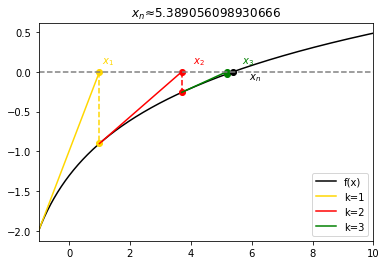

(5.389056098930666, 7)

In [3]:
newton_raphson(lambda x: np.log(x+2)-2, -1, 10, precyzja=10**(-8))

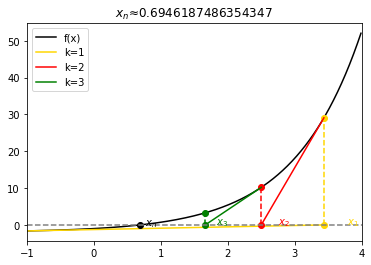

(0.6946187486354347, 7)

In [4]:
newton_raphson(lambda x: np.exp(x) - 2, -1, 4, precyzja=2**(-7), wykres=True)

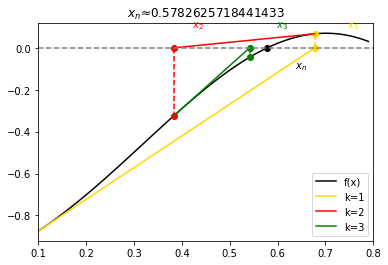

(0.5782625718441433, 7)

In [5]:
newton_raphson(lambda x: x*np.sin(np.pi*x)-np.exp(-x), 0.1, 0.8)

In [6]:
def bisekcja(f, a, b, precyzja=10**(-6)):
    '''
    Funkcja oblicza miejsce zerowe dla funkcji na 
    przedziale stosując metodę bisekcji.

    Argumenty:
    f (funkcja) - funkcja na której szukamy miejsca zerowgo
    a (int) - początek przedziału
    b (int) - koniec przedziału
    precyzja (int) - przybliżenie wyniku (domyślnie = 10**(-6))
    '''
    i = 0
    c = (a+b)/2
    pół_długości = (b-a)/2
    if pół_długości <= precyzja:
        return c, i
    f_a = f(a)
    while pół_długości > precyzja:
        i += 1
        f_c = f(c)
        if f_a*f_c < 0:
            b = c
        elif f_a*f_c > 0:
            a = c
            f_a = f_c
        else:
            return c
        pół_długości /= 2
        c = (a+b)/2
    return (c, i)

In [7]:
def bisekcja_vs_newton(f, a, b, ile=30):
    '''
    Funkcja porównuje liczbę kroków przy liczeniu miejsca zerowego
    między metodą bisekcji a metodą Newtona-Raphsona

    Argumenty:
    f (funkcja) - funkcja na której szukamy miejsca zerowgo
    a (int) - początek przedziału
    b (int) - koniec przedziału
    ile (int) - ile dokładności chcemy sprawdzić (domyślnie 30)
    '''
    t = np.arange(0, ile+1)
    kroki_bisekcja = []
    kroki_newton = []
    for k in range(0, ile+1):
        kroki_bisekcja.append(bisekcja(f, a, b, precyzja=2**(-k))[1])
        kroki_newton.append(newton_raphson(
            f, a, b, precyzja=2**(-k), wykres=False)[1])
    plt.scatter(t, kroki_bisekcja, label='Matoda bisekcji')
    plt.scatter(t, kroki_newton, label='Metoda Newtona-Raphson')
    plt.title('Porównanie metod bisekcji i Newtona-Raphsona')
    plt.xlabel('Dokładność $2^{-k}$ w zależności od $k$')
    plt.ylabel('Liczba kroków')
    x_label = [f'$2^{{{-k}}}$' for k in range(0, ile+1)]
    plt.xticks(t[::4], x_label[::4])
    plt.legend()
    plt.show()

Przykłady

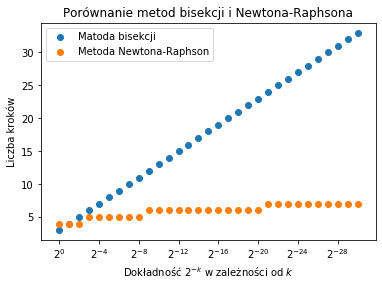

In [8]:
bisekcja_vs_newton(lambda x: np.log(x+2)-2, -1, 10)

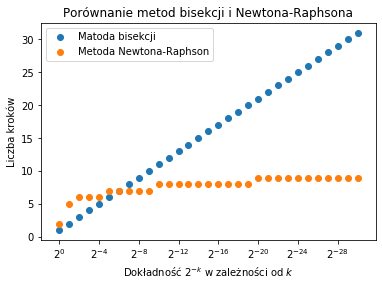

In [9]:
bisekcja_vs_newton(lambda x: np.exp(x)-2, -1, 2)

Jak możemy zobaczyć na wykresie wraz z większą dokładnością zwiększa się <br/>
liczba kroków w obu operacjach. Jednak metoda bisekcji rośnie znacznie <br/>
szybciej niż metoda Newtona-Raphsona. <br/>
<br/>
Możemy też zauważyć że liczba kroków  w metodzie bisekcji rośnie liniowo. <br/>
Jest to spowodowane tym że dokładności na osi X są kolejnymi odwróconymi  <br/>
potęgami liczby 2, a metoda bisekcji w kazdym kroku dzieli odcinek w <br/>
którym jst punkt zerowy na pół. <br/>
<br/>
Wykres mówi nam też dla jakich dokładności powinniśmy używać której metody. <br/>
Dla małych dokładności metoda bisekcji jest generalnie szybsza (chodź zależy <br/>
to od badanej funkcji), dla większych natomiast metoda Newtona-Raphsona jest <br/> 
zdecydowanym zwycięzcą.